<a href="https://colab.research.google.com/github/ayushtankha/TSP/blob/main/TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Importing Libraries and Dataset**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


**DATA HEADER INFO**


NASA/POWER CERES/MERRA2 Native Resolution Daily Data




**Dates (month/day/year): 01/01/2017 through 08/01/2023**
*   Location: Latitude  35.0382   Longitude 9.4849
*   Elevation from MERRA-2: Average for 0.5 x 0.625 degree lat/lon region = 408.34 meters

**The value for missing source data that cannot be computed or is outside of the sources availability range: -**
999 Parameter(s):

*   T2M             MERRA-2 Temperature at 2 Meters (C)

*   WD10M                   MERRA-2 Wind Direction at 10 Meters (Degrees)

*   WS50M                   MERRA-2 Wind Speed at 50 Meters (m/s)



*   RH2M            MERRA-2 Relative Humidity at 2 Meters (%)


*   PRECTOTCORR     MERRA-2 Precipitation Corrected (mm/day)


*   WS10M           MERRA-2 Wind Speed at 10 Meters (m/s)



*   T2MDEW                  MERRA-2 Dew/Frost Point at 2 Meters (C)


*   TS                      MERRA-2 Earth Skin Temperature (C)


*   PS                      MERRA-2 Surface Pressure (kPa)

*   WD50M                   MERRA-2 Wind Direction at 50 Meters (Degrees)



*   ALLSKY_SFC_UV_INDEX     CERES SYN1deg All Sky Surface UV Index (dimensionless)








In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
weather_df = pd.read_csv('/content/drive/MyDrive/Telecom/Tunisia Weather All Data.csv')

In [7]:
weather_df.head()

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_UVA,...,T2M_MAX,T2M_MIN,TS,WS10M,WD10M,WS50M,WD50M,PS,PRECTOTCORR,RH2M
0,1983,1,1,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,13.02,-0.81,4.48,2.43,263.62,3.73,265.12,98.23,0.11,70.38
1,1983,1,2,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,12.84,0.74,4.75,3.12,264.19,4.79,263.56,98.09,0.07,76.56
2,1983,1,3,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,11.65,0.27,4.99,3.73,212.50,6.01,212.62,98.47,0.16,84.56
3,1983,1,4,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,14.50,2.96,6.81,3.09,302.56,4.49,303.19,98.57,0.07,75.50
4,1983,1,5,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,18.82,3.52,8.19,4.40,285.00,7.34,285.31,98.22,0.00,58.75


In [8]:
weather_df.describe()

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,CLRSKY_SFC_PAR_TOT,ALLSKY_SFC_UV_INDEX,ALLSKY_SFC_UVA,...,T2M_MAX,T2M_MIN,TS,WS10M,WD10M,WS50M,WD50M,PS,PRECTOTCORR,RH2M
count,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.00000,...,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000,14823.000000
mean,2002.794239,6.487216,15.727653,-19.791473,-40.417642,307.804991,48.303071,-401.614629,-459.686304,-453.10563,...,25.696512,12.301806,19.251500,3.858334,191.946356,5.471918,193.527115,96.931272,0.928046,56.382699
std,11.717341,3.445210,8.800459,155.602488,198.254258,212.069625,219.750293,551.918784,498.621231,503.82823,...,8.576722,6.970212,8.748693,1.460729,78.890312,2.023342,78.800864,0.520225,3.203437,14.957993
min,1983.000000,1.000000,1.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.00000,...,4.940000,-3.830000,1.360000,1.040000,7.440000,1.380000,8.000000,94.600000,0.000000,13.310000
25%,1993.000000,4.000000,8.000000,3.110000,0.510000,302.745000,56.600000,-999.000000,-999.000000,-999.00000,...,18.405000,6.230000,11.305000,2.810000,131.500000,3.960000,133.470000,96.640000,0.000000,45.380000
50%,2003.000000,6.000000,16.000000,4.780000,0.600000,339.000000,88.570000,58.040000,0.350000,5.28000,...,25.250000,11.820000,18.760000,3.570000,194.940000,5.090000,198.060000,96.920000,0.030000,56.380000
75%,2013.000000,9.000000,23.000000,6.640000,0.670000,375.500000,126.500000,114.270000,1.300000,12.25000,...,32.980000,18.470000,27.015000,4.620000,253.500000,6.640000,254.750000,97.220000,0.440000,67.810000
max,2023.000000,12.000000,31.000000,8.870000,0.790000,456.600000,166.800000,164.380000,2.990000,21.33000,...,46.360000,30.190000,38.900000,14.610000,351.380000,18.820000,351.750000,99.070000,92.400000,96.440000


In [9]:
weather_df.info()

# 22 features in total and 14823 data points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14823 entries, 0 to 14822
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 14823 non-null  int64  
 1   MO                   14823 non-null  int64  
 2   DY                   14823 non-null  int64  
 3   ALLSKY_SFC_SW_DWN    14823 non-null  float64
 4   ALLSKY_KT            14823 non-null  float64
 5   ALLSKY_SFC_LW_DWN    14823 non-null  float64
 6   ALLSKY_SFC_PAR_TOT   14823 non-null  float64
 7   CLRSKY_SFC_PAR_TOT   14823 non-null  float64
 8   ALLSKY_SFC_UV_INDEX  14823 non-null  float64
 9   ALLSKY_SFC_UVA       14823 non-null  float64
 10  ALLSKY_SFC_UVB       14823 non-null  float64
 11  T2M                  14823 non-null  float64
 12  T2MDEW               14823 non-null  float64
 13  T2M_MAX              14823 non-null  float64
 14  T2M_MIN              14823 non-null  float64
 15  TS                   14823 non-null 

## **2. Data Visualization**

<Axes: >

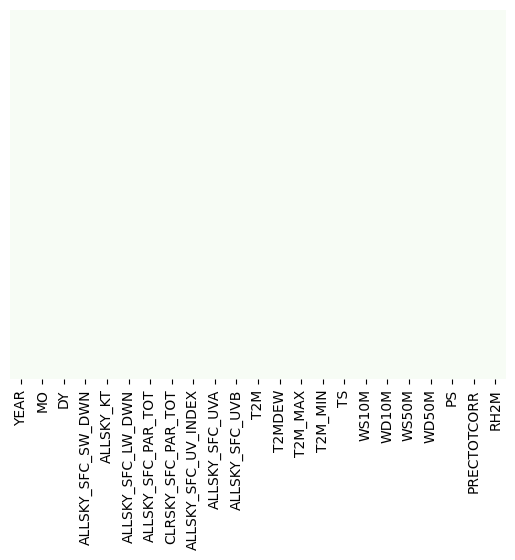

In [10]:
#Checking for null values in dataset

sns.heatmap(weather_df.isnull(), yticklabels = False, cbar = False, cmap = 'Greens')

array([[<Axes: title={'center': 'YEAR'}>, <Axes: title={'center': 'MO'}>,
        <Axes: title={'center': 'DY'}>,
        <Axes: title={'center': 'ALLSKY_SFC_SW_DWN'}>,
        <Axes: title={'center': 'ALLSKY_KT'}>],
       [<Axes: title={'center': 'ALLSKY_SFC_LW_DWN'}>,
        <Axes: title={'center': 'ALLSKY_SFC_PAR_TOT'}>,
        <Axes: title={'center': 'CLRSKY_SFC_PAR_TOT'}>,
        <Axes: title={'center': 'ALLSKY_SFC_UV_INDEX'}>,
        <Axes: title={'center': 'ALLSKY_SFC_UVA'}>],
       [<Axes: title={'center': 'ALLSKY_SFC_UVB'}>,
        <Axes: title={'center': 'T2M'}>,
        <Axes: title={'center': 'T2MDEW'}>,
        <Axes: title={'center': 'T2M_MAX'}>,
        <Axes: title={'center': 'T2M_MIN'}>],
       [<Axes: title={'center': 'TS'}>,
        <Axes: title={'center': 'WS10M'}>,
        <Axes: title={'center': 'WD10M'}>,
        <Axes: title={'center': 'WS50M'}>,
        <Axes: title={'center': 'WD50M'}>],
       [<Axes: title={'center': 'PS'}>,
        <Axes: title={'ce

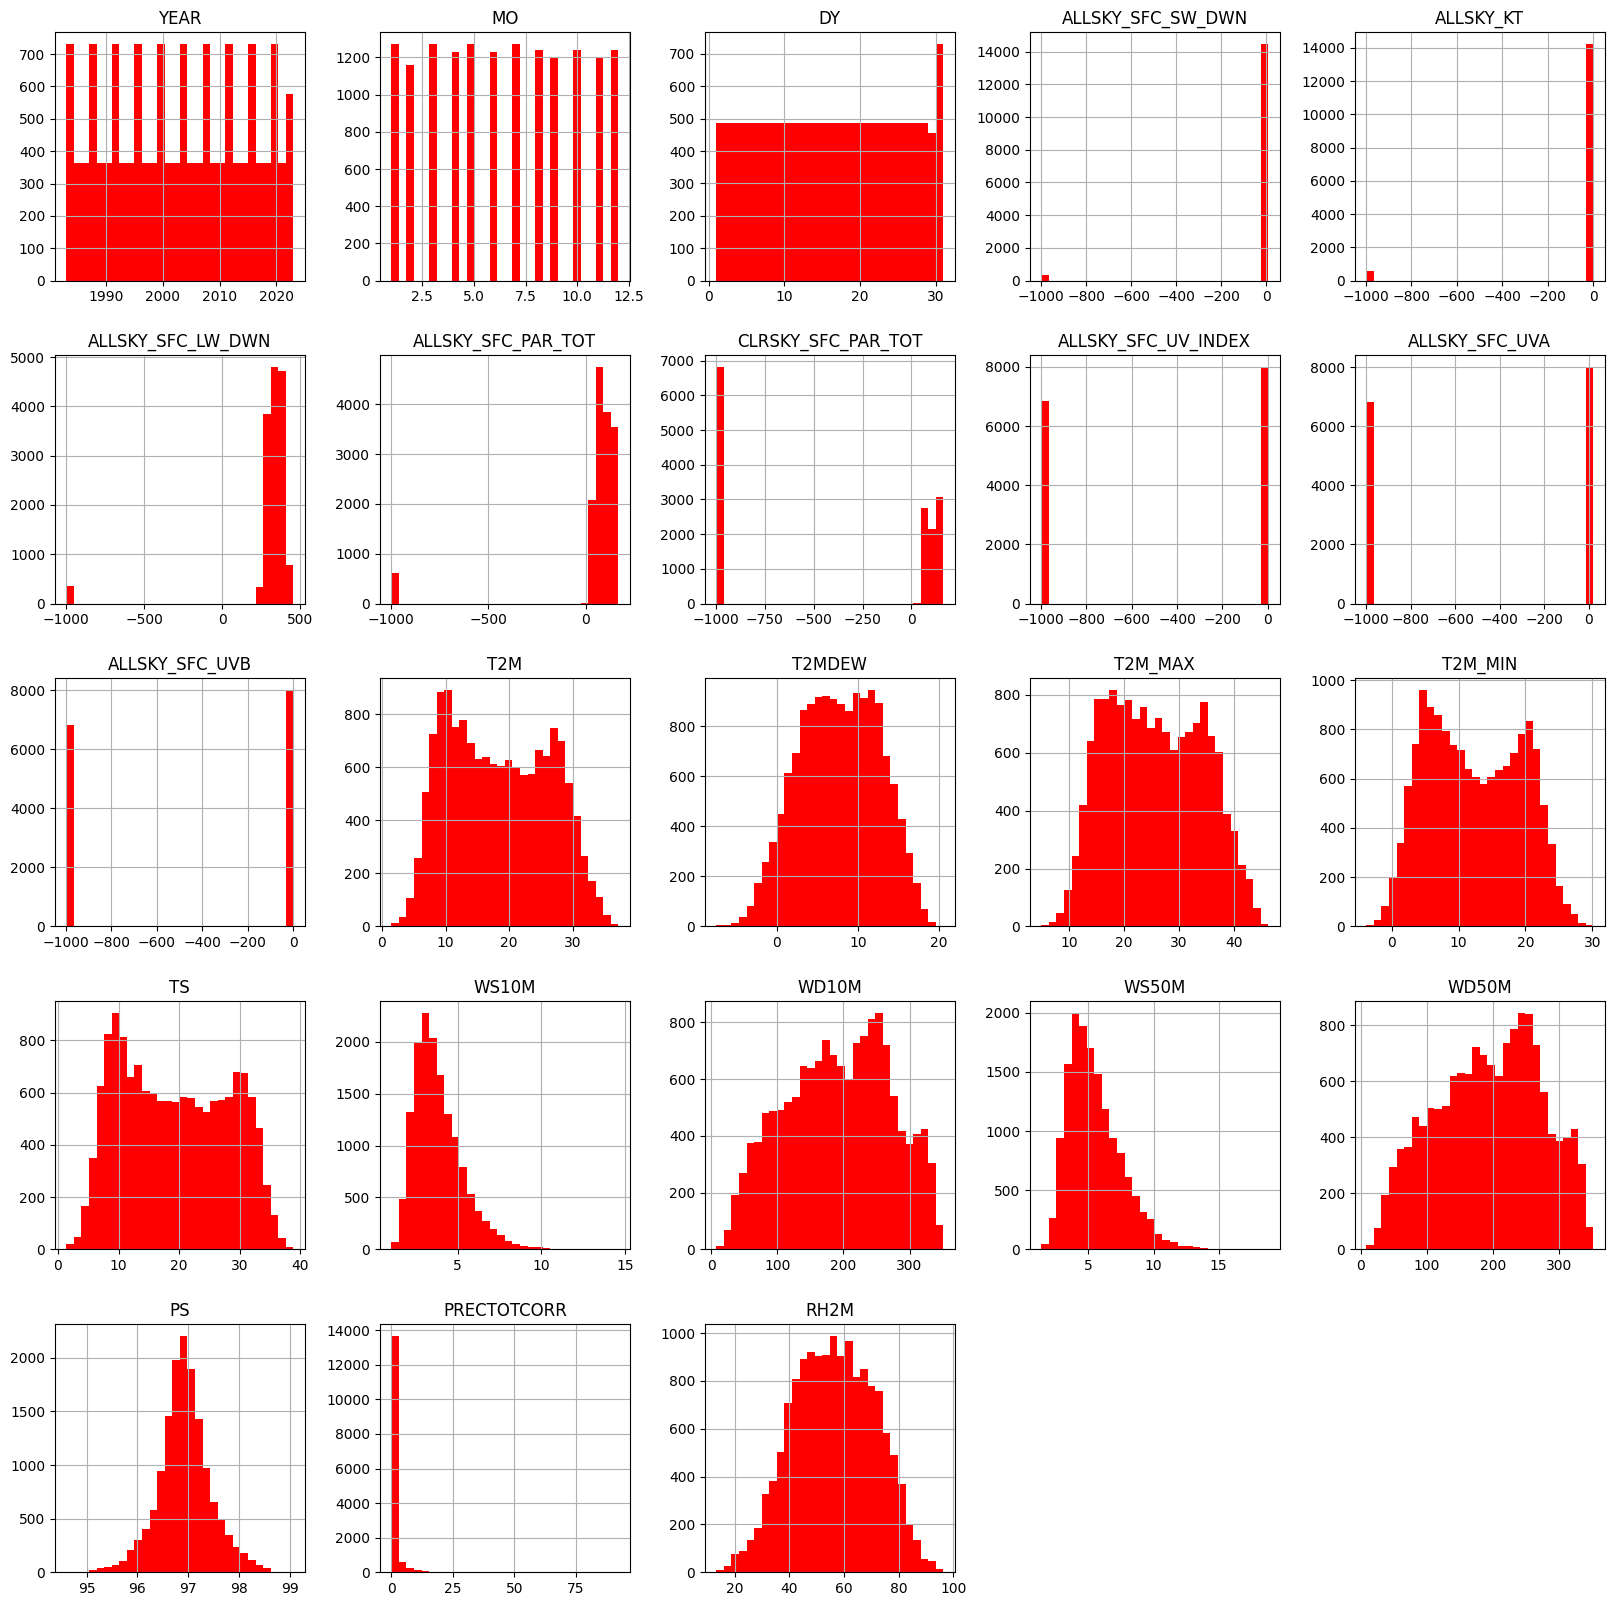

In [11]:
weather_df.hist(bins = 30, figsize = (20,20), color = 'r' )

<Axes: >

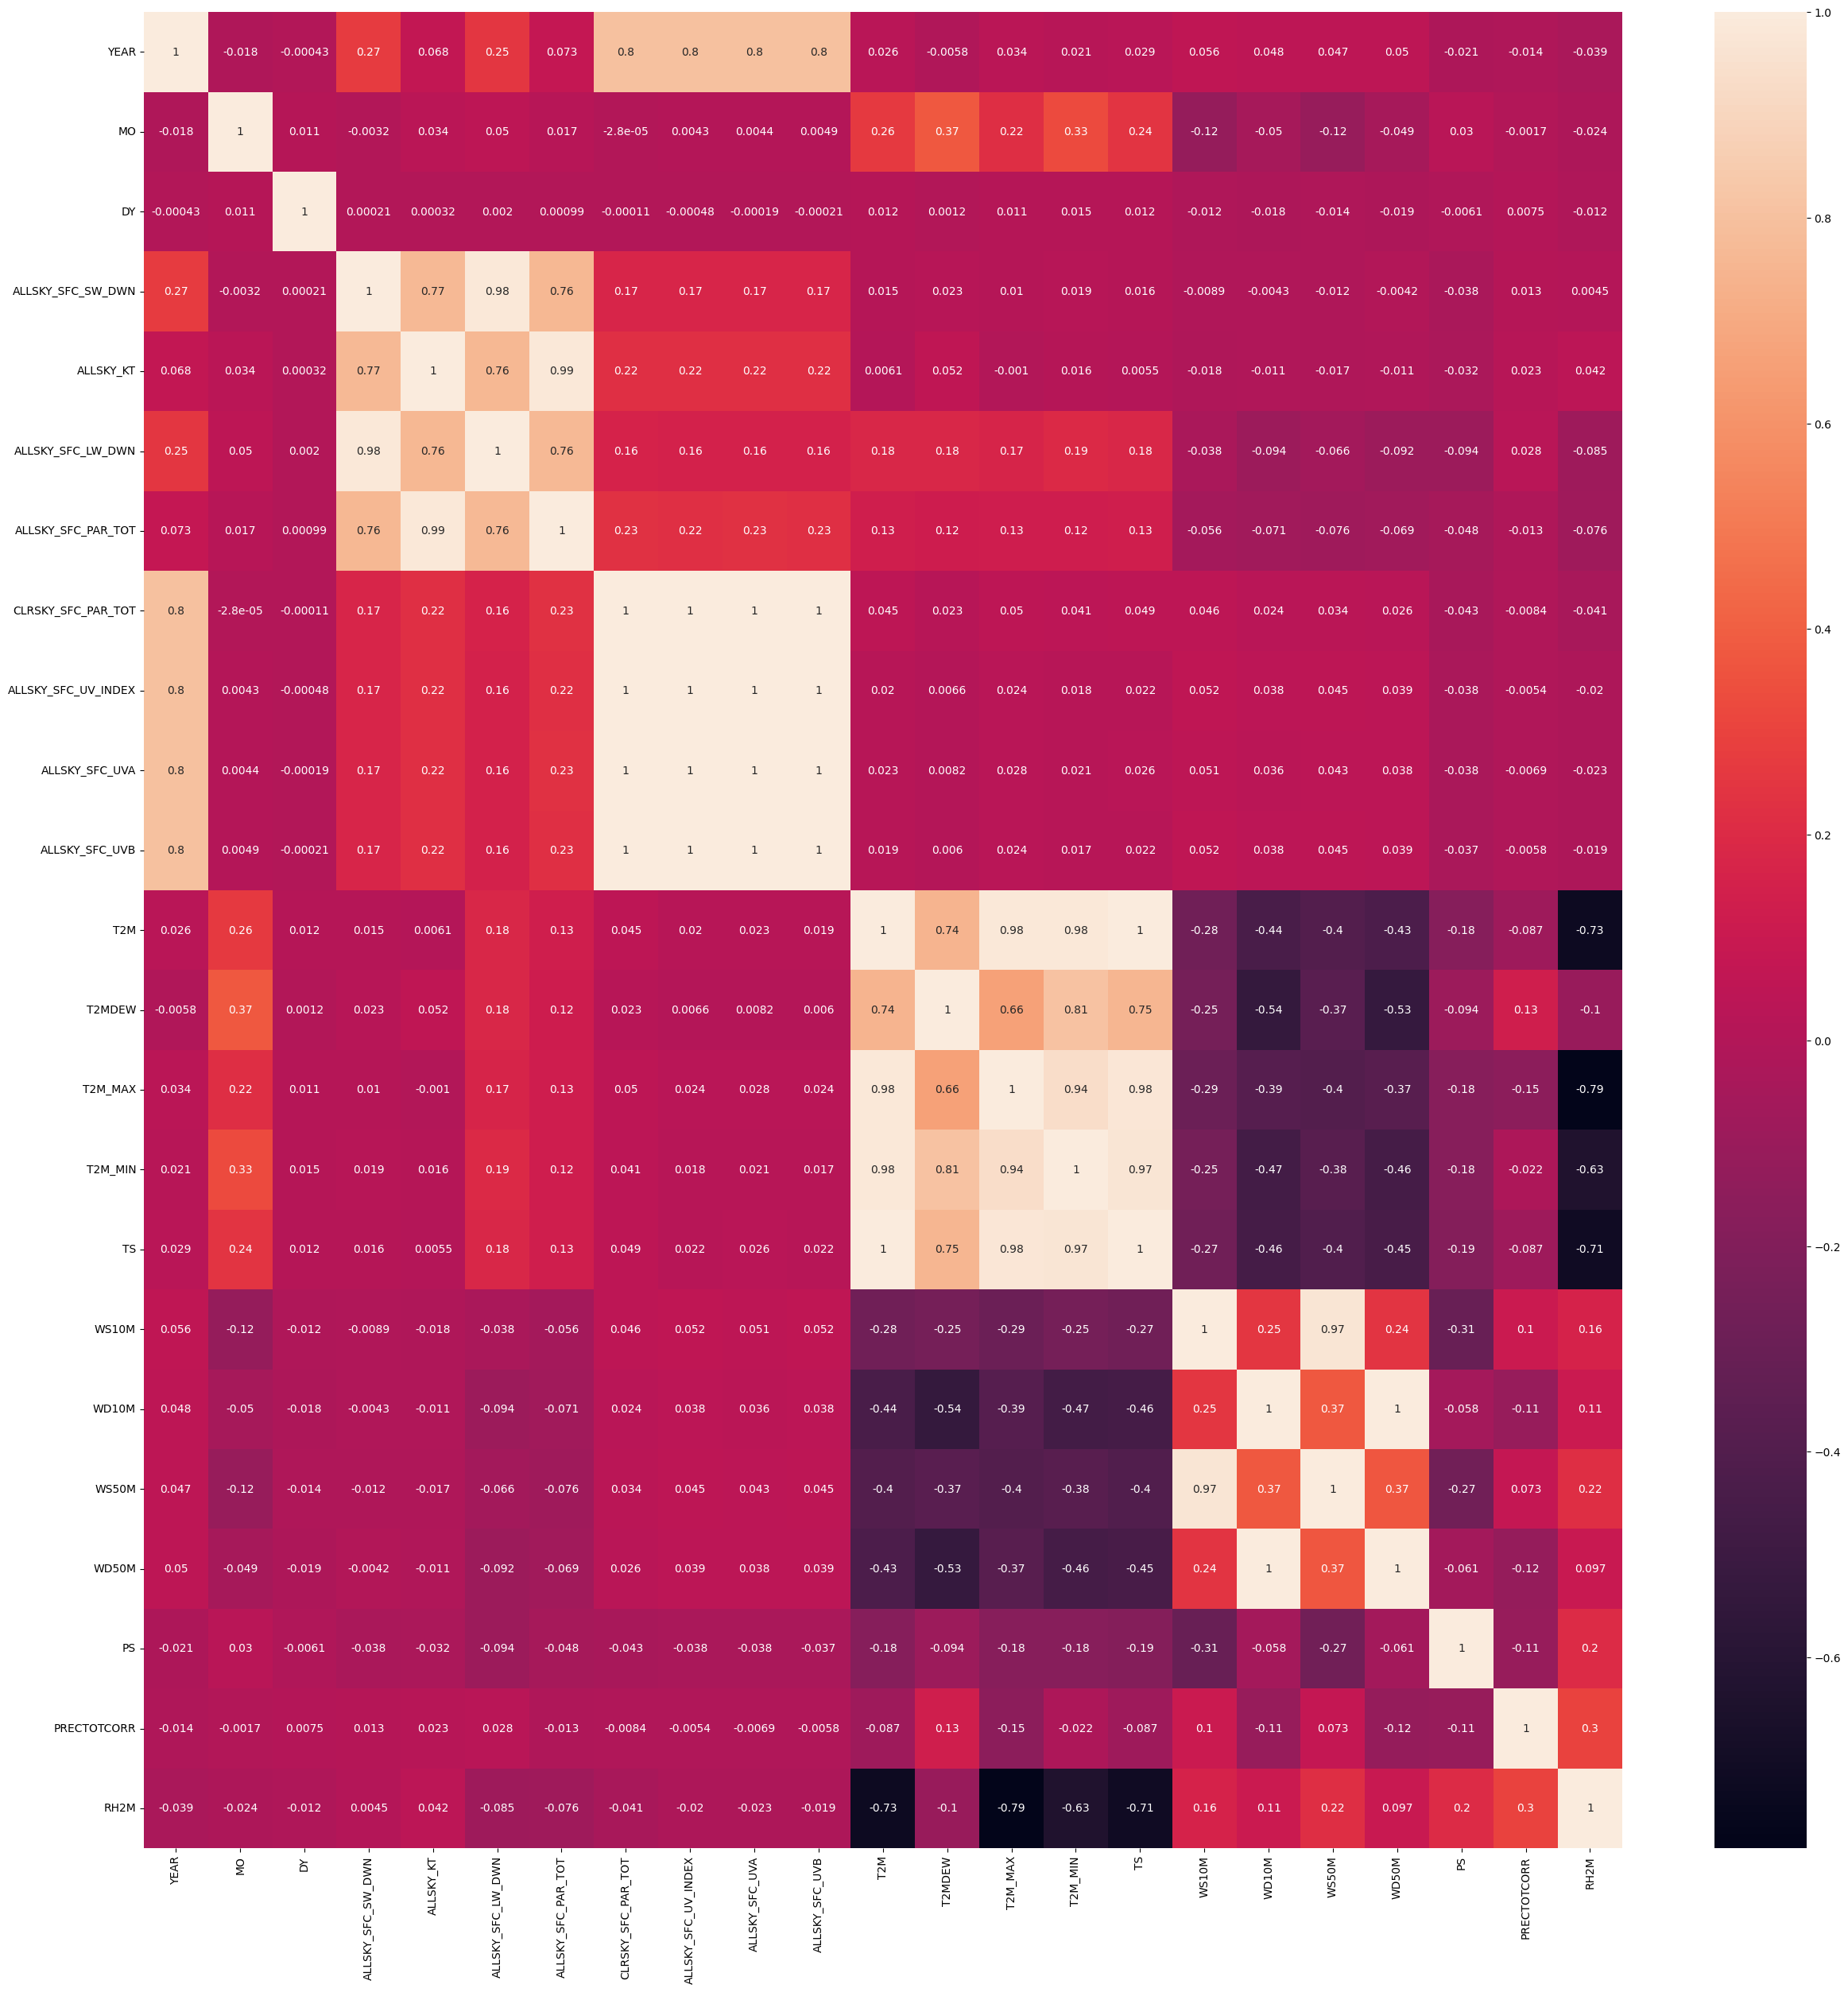

In [12]:
correlations = weather_df.corr()
f, ax = plt.subplots(figsize = (30,30))
sns.heatmap(correlations, annot = True)



In [13]:
weather_df.columns

Index(['YEAR', 'MO', 'DY', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_KT',
       'ALLSKY_SFC_LW_DWN', 'ALLSKY_SFC_PAR_TOT', 'CLRSKY_SFC_PAR_TOT',
       'ALLSKY_SFC_UV_INDEX', 'ALLSKY_SFC_UVA', 'ALLSKY_SFC_UVB', 'T2M',
       'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'TS', 'WS10M', 'WD10M', 'WS50M',
       'WD50M', 'PS', 'PRECTOTCORR', 'RH2M'],
      dtype='object')

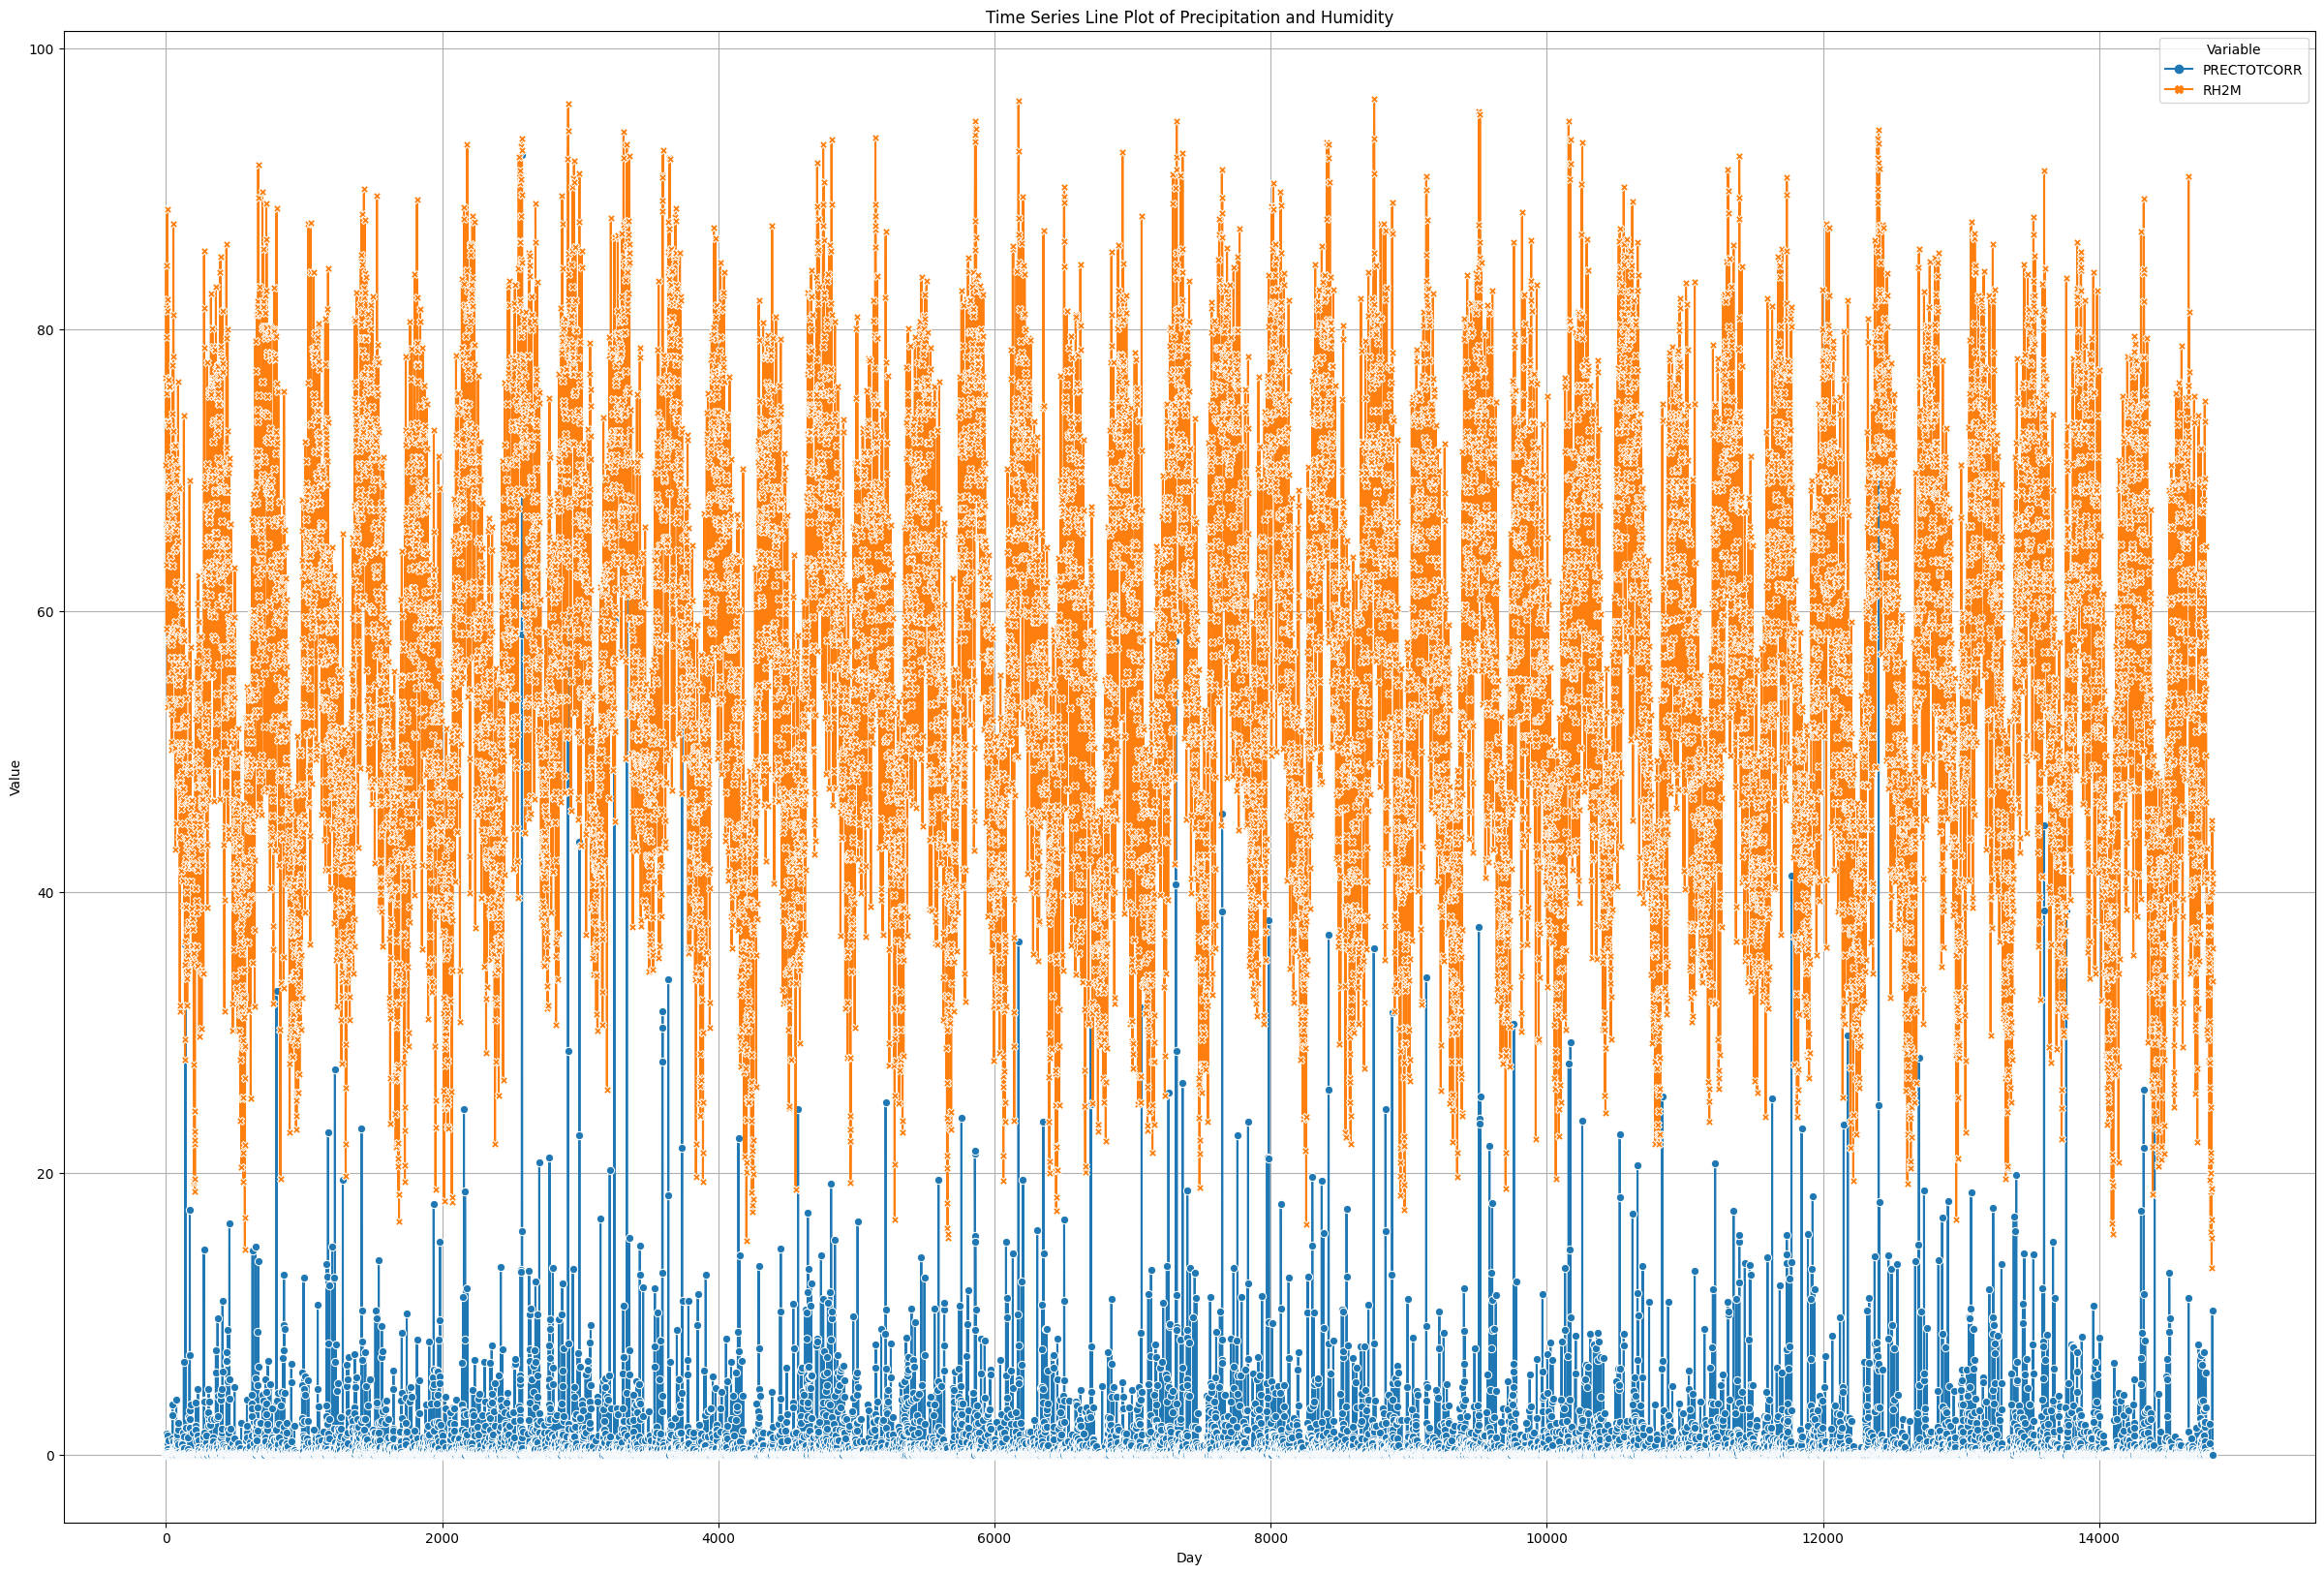

In [14]:
# Lets see precipitaion vs Humidity

plt.figure(figsize = (30,20)),
sns.lineplot(data = weather_df[['PRECTOTCORR','RH2M']],markers = True, dashes = False)
plt.title('Time Series Line Plot of Precipitation and Humidity')
plt.xlabel('Day')
plt.ylabel('Value')
plt.legend(title='Variable')
plt.grid(True)
plt.show()


### **3. Create Testing and Training Dataset and Perform Data Cleaning**

In [15]:

X_modified = weather_df[['YEAR','MO','DY','ALLSKY_SFC_SW_DWN', 'ALLSKY_KT',
       'ALLSKY_SFC_LW_DWN', 'ALLSKY_SFC_PAR_TOT', 'T2M',
       'T2MDEW', 'T2M_MAX', 'T2M_MIN', 'TS', 'WS10M', 'WD10M', 'WS50M',
       'WD50M', 'PS', 'PRECTOTCORR', 'RH2M']]

In [16]:
X_modified

# We dont have exact data for 'ALLSKY_SFC_SW_DWN', 'ALLSKY_KT', 'ALLSKY_SFC_LW_DWN', 'ALLSKY_SFC_PAR_TOT' for the year 1983
# So we remove data of 1983 from dataframe

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,T2M,T2MDEW,T2M_MAX,T2M_MIN,TS,WS10M,WD10M,WS50M,WD50M,PS,PRECTOTCORR,RH2M
0,1983,1,1,-999.00,-999.0,-999.00,-999.0,5.48,-0.01,13.02,-0.81,4.48,2.43,263.62,3.73,265.12,98.23,0.11,70.38
1,1983,1,2,-999.00,-999.0,-999.00,-999.0,5.80,1.58,12.84,0.74,4.75,3.12,264.19,4.79,263.56,98.09,0.07,76.56
2,1983,1,3,-999.00,-999.0,-999.00,-999.0,5.43,3.12,11.65,0.27,4.99,3.73,212.50,6.01,212.62,98.47,0.16,84.56
3,1983,1,4,-999.00,-999.0,-999.00,-999.0,7.59,3.09,14.50,2.96,6.81,3.09,302.56,4.49,303.19,98.57,0.07,75.50
4,1983,1,5,-999.00,-999.0,-999.00,-999.0,9.02,0.41,18.82,3.52,8.19,4.40,285.00,7.34,285.31,98.22,0.00,58.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14818,2023,7,28,7.35,-999.0,431.38,-999.0,32.46,16.51,42.51,23.64,35.21,4.52,194.25,5.59,197.81,96.77,0.00,45.12
14819,2023,7,29,7.48,-999.0,433.92,-999.0,35.83,11.48,46.36,24.97,37.42,5.73,210.88,7.56,212.00,96.61,0.00,33.69
14820,2023,7,30,7.11,-999.0,442.92,-999.0,34.77,17.39,44.59,27.04,37.63,1.55,141.94,1.70,142.75,96.73,10.23,40.62
14821,2023,7,31,7.34,-999.0,410.23,-999.0,32.71,16.79,39.90,26.26,35.37,1.86,110.81,2.50,112.00,96.71,0.00,41.38


In [17]:
X_modified = X_modified.loc[X_modified['YEAR']!=1983]

In [18]:
X_modified

,YEAR,MO,DY,ALLSKY_SFC_SW_DWN,ALLSKY_KT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_PAR_TOT,T2M,T2MDEW,T2M_MAX,T2M_MIN,TS,WS10M,WD10M,WS50M,WD50M,PS,PRECTOTCORR,RH2M
365,1984,1,1,2.03,0.45,283.60,39.4,9.14,5.12,15.94,4.22,8.96,2.42,268.31,4.05,283.12,97.75,0.01,77.19
366,1984,1,2,2.74,0.59,270.90,52.9,10.09,2.67,18.83,4.33,8.85,2.64,254.25,3.92,255.06,97.88,0.00,63.88
367,1984,1,3,2.56,0.55,291.60,49.7,10.67,1.18,19.44,6.08,9.15,3.36,266.31,5.36,266.94,97.57,0.00,54.12
368,1984,1,4,2.65,0.57,274.50,51.2,9.92,-1.13,18.74,4.86,9.35,2.89,248.12,5.30,251.19,96.80,0.12,49.00
369,1984,1,5,1.57,0.34,310.60,31.5,6.67,2.05,10.01,4.45,6.12,7.02,146.88,9.49,147.50,96.79,2.59,73.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14818,2023,7,28,7.35,-999.00,431.38,-999.0,32.46,16.51,42.51,23.64,35.21,4.52,194.25,5.59,197.81,96.77,0.00,45.12
14819,2023,7,29,7.48,-999.00,433.92,-999.0,35.83,11.48,46.36,24.97,37.42,5.73,210.88,7.56,212.00,96.61,0.00,33.69
14820,2023,7,30,7.11,-999.00,442.92,-999.0,34.77,17.39,44.59,27.04,37.63,1.55,141.94,1.70,142.75,96.73,10.23,40.62
14821,2023,7,31,7.34,-999.00,410.23,-999.0,32.71,16.79,39.90,26.26,35.37,1.86,110.81,2.50,112.00,96.71,0.00,41.38


In [19]:
import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(X_modified, *['ALLSKY_SFC_SW_DWN'], **{})
chart

In [20]:
import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(X_modified, *['YEAR', 'ALLSKY_SFC_LW_DWN', None], **{})
chart

In [21]:
X_modified.columns

Index(['YEAR', 'MO', 'DY', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_KT',
       'ALLSKY_SFC_LW_DWN', 'ALLSKY_SFC_PAR_TOT', 'T2M', 'T2MDEW', 'T2M_MAX',
       'T2M_MIN', 'TS', 'WS10M', 'WD10M', 'WS50M', 'WD50M', 'PS',
       'PRECTOTCORR', 'RH2M'],
      dtype='object')

In [22]:
#Dropping dates,month and years column

X_no_dates = X_modified[['ALLSKY_SFC_SW_DWN', 'ALLSKY_KT',
       'ALLSKY_SFC_LW_DWN', 'ALLSKY_SFC_PAR_TOT', 'T2M', 'T2MDEW', 'T2M_MAX',
       'T2M_MIN', 'TS', 'WS10M', 'WD10M', 'WS50M', 'WD50M', 'PS', 'RH2M']]



In [23]:
from  sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X_modified)


In [24]:
X

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.04697987e-01, 1.08225108e-04, 7.68434981e-01],
       [0.00000000e+00, 0.00000000e+00, 3.33333333e-02, ...,
        7.33780761e-01, 0.00000000e+00, 6.08324311e-01],
       [0.00000000e+00, 0.00000000e+00, 6.66666667e-02, ...,
        6.64429530e-01, 0.00000000e+00, 4.90917840e-01],
       ...,
       [1.00000000e+00, 5.45454545e-01, 9.66666667e-01, ...,
        4.76510067e-01, 1.10714286e-01, 3.28521593e-01],
       [1.00000000e+00, 5.45454545e-01, 1.00000000e+00, ...,
        4.72035794e-01, 0.00000000e+00, 3.37663900e-01],
       [1.00000000e+00, 6.36363636e-01, 0.00000000e+00, ...,
        4.34004474e-01, 1.08225108e-04, 2.72945988e-01]])

In [25]:
y = X_modified['PRECTOTCORR']

In [26]:
y

365       0.01
366       0.00
367       0.00
368       0.12
369       2.59
         ...  
14818     0.00
14819     0.00
14820    10.23
14821     0.00
14822     0.01
Name: PRECTOTCORR, Length: 14458, dtype: float64

### **4. TRAIN AND EVALUATE A RANDOM FOREST REGRESSOR**

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

In [28]:
X_train.shape, y_train.shape

((10843, 19), (10843,))

In [29]:
from sklearn.ensemble import RandomForestRegressor


#Using basic RF
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 5, random_state = 18).fit(X_train, y_train)

In [30]:
from sklearn.metrics import mean_squared_error, r2_score


prediction = rf.predict(X_test)
mse = mean_squared_error(y_test, prediction)
rmse = mse**.5
print(mse)
print(rmse)

2.9242692861189687
1.7100494981488017


In [84]:
prediction

array([0.18117899, 0.95071113, 1.03891331, ..., 0.64476272, 0.40200618,
       0.46198793])

In [31]:
## Define Grid

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime

#Using Cross Validation and Multiple Parameters for RF

grid = {
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt','log2'],
    'max_depth' : [3,4,5,6,7],
    'random_state' : [18]
}
## show start time
print(datetime.now())
## Grid Search function
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv= 5)
CV_rfr.fit(X_train, y_train)


## show end time
print(datetime.now())

2023-08-14 18:19:12.470271
2023-08-14 18:34:14.022240


In [32]:
best_rf_model = CV_rfr.best_estimator_
best_rf_model

RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=400,
                      random_state=18)

In [33]:
# Predict on test data
prediction = best_rf_model.predict(X_test)
# Compute mean squared error
mse = mean_squared_error(y_test, prediction)
# Print results
print(mse)
print(mse**0.5)

#Below result is better than our base model

2.2385902136635107
1.4961919040228464


### **5. TRAIN AND EVALUATE A DEEP LEARNING MODEL**

In [93]:
import tensorflow as tf

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation = 'relu', input_shape = (19,)))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units = 500, activation ='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units = 500, activation ='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units = 1, activation ='relu'))

In [94]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 500)               10000     
                                                                 
 dropout_3 (Dropout)         (None, 500)               0         
                                                                 
 dense_36 (Dense)            (None, 500)               250500    
                                                                 
 dropout_4 (Dropout)         (None, 500)               0         
                                                                 
 dense_37 (Dense)            (None, 500)               250500    
                                                                 
 dropout_5 (Dropout)         (None, 500)               0         
                                                                 
 dense_38 (Dense)            (None, 1)                

In [95]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [96]:
from tensorflow.keras.callbacks import EarlyStopping


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001)


In [97]:
epochs_hist = model.fit(X_train, y_train, epochs =100, batch_size = 50, callbacks = [early_stopping])

Epoch 1/100
216/217 [============================>.] - ETA: 0s - loss: 4.8923 - accuracy: 0.3451

217/217 [==============================] - 7s 24ms/step - loss: 4.8760 - accuracy: 0.3456
Epoch 2/100
214/217 [============================>.] - ETA: 0s - loss: 1.8709 - accuracy: 0.3537

217/217 [==============================] - 5s 21ms/step - loss: 1.8665 - accuracy: 0.3541
Epoch 3/100
213/217 [============================>.] - ETA: 0s - loss: 0.6686 - accuracy: 0.3762

217/217 [==============================] - 3s 13ms/step - loss: 0.6622 - accuracy: 0.3756
Epoch 4/100
215/217 [============================>.] - ETA: 0s - loss: 0.4581 - accuracy: 0.3807

217/217 [==============================] - 3s 13ms/step - loss: 0.4562 - accuracy: 0.3811
Epoch 5/100
215/217 [============================>.] - ETA: 0s - loss: 0.4169 - accuracy: 0.3810

217/217 [==============================] - 3s 14ms/step - loss: 0.4171 - accuracy: 0.3814
Epoch 6/100
217/217 [==============================] - ETA: 0s - loss: 0.3151 - accuracy: 0.3852

217/217 [==============================] - 4s 19ms/step - loss: 0.3151 - accuracy: 0.3852
Epoch 7/100
217/217 [==============================] - ETA: 0s - loss: 0.3565 - accuracy: 0.3853

217/217 [==============================] - 3s 12ms/step - loss: 0.3565 - accuracy: 0.3853
Epoch 8/100
216/217 [============================>.] - ETA: 0s - loss: 0.2923 - accuracy: 0.3866

217/217 [==============================] - 3s 13ms/step - loss: 0.2914 - accuracy: 0.3870
Epoch 9/100
215/217 [============================>.] - ETA: 0s - loss: 0.2447 - accuracy: 0.3884

217/217 [==============================] - 3s 13ms/step - loss: 0.2455 - accuracy: 0.3885
Epoch 10/100
217/217 [==============================] - ETA: 0s - loss: 0.3090 - accuracy: 0.3850

217/217 [==============================] - 4s 16ms/step - loss: 0.3090 - accuracy: 0.3850
Epoch 11/100
215/217 [============================>.] - ETA: 0s - loss: 0.2332 - accuracy: 0.3892

217/217 [==============================] - 4s 17ms/step - loss: 0.2324 - accuracy: 0.3893
Epoch 12/100
216/217 [============================>.] - ETA: 0s - loss: 0.2306 - accuracy: 0.3883

217/217 [==============================] - 3s 13ms/step - loss: 0.2301 - accuracy: 0.3882
Epoch 13/100
214/217 [============================>.] - ETA: 0s - loss: 0.3273 - accuracy: 0.3871

217/217 [==============================] - 3s 13ms/step - loss: 0.3252 - accuracy: 0.3873
Epoch 14/100
217/217 [==============================] - ETA: 0s - loss: 0.2155 - accuracy: 0.3893

217/217 [==============================] - 3s 13ms/step - loss: 0.2155 - accuracy: 0.3893
Epoch 15/100
215/217 [============================>.] - ETA: 0s - loss: 0.2674 - accuracy: 0.3885

217/217 [==============================] - 4s 19ms/step - loss: 0.2666 - accuracy: 0.3884
Epoch 16/100
214/217 [============================>.] - ETA: 0s - loss: 0.2293 - accuracy: 0.3907

217/217 [==============================] - 4s 19ms/step - loss: 0.2292 - accuracy: 0.3897
Epoch 17/100
216/217 [============================>.] - ETA: 0s - loss: 0.1917 - accuracy: 0.3902

217/217 [==============================] - 3s 13ms/step - loss: 0.1913 - accuracy: 0.3905
Epoch 18/100
213/217 [============================>.] - ETA: 0s - loss: 0.2434 - accuracy: 0.3888

217/217 [==============================] - 3s 13ms/step - loss: 0.2421 - accuracy: 0.3893
Epoch 19/100
215/217 [============================>.] - ETA: 0s - loss: 0.2227 - accuracy: 0.3898

217/217 [==============================] - 4s 17ms/step - loss: 0.2215 - accuracy: 0.3893
Epoch 20/100
215/217 [============================>.] - ETA: 0s - loss: 0.2064 - accuracy: 0.3904

217/217 [==============================] - 4s 16ms/step - loss: 0.2053 - accuracy: 0.3904
Epoch 21/100
216/217 [============================>.] - ETA: 0s - loss: 0.1988 - accuracy: 0.3919

217/217 [==============================] - 3s 13ms/step - loss: 0.1986 - accuracy: 0.3913
Epoch 22/100
214/217 [============================>.] - ETA: 0s - loss: 0.1988 - accuracy: 0.3897

217/217 [==============================] - 3s 12ms/step - loss: 0.2002 - accuracy: 0.3891
Epoch 23/100
214/217 [============================>.] - ETA: 0s - loss: 0.1760 - accuracy: 0.3915

217/217 [==============================] - 3s 12ms/step - loss: 0.1761 - accuracy: 0.3916
Epoch 24/100
217/217 [==============================] - ETA: 0s - loss: 0.2034 - accuracy: 0.3902

217/217 [==============================] - 4s 19ms/step - loss: 0.2034 - accuracy: 0.3902
Epoch 25/100
213/217 [============================>.] - ETA: 0s - loss: 0.2785 - accuracy: 0.3900

217/217 [==============================] - 3s 14ms/step - loss: 0.2768 - accuracy: 0.3903
Epoch 26/100
214/217 [============================>.] - ETA: 0s - loss: 0.3119 - accuracy: 0.3891

217/217 [==============================] - 3s 13ms/step - loss: 0.3110 - accuracy: 0.3884
Epoch 27/100
213/217 [============================>.] - ETA: 0s - loss: 0.1701 - accuracy: 0.3917

217/217 [==============================] - 3s 13ms/step - loss: 0.1695 - accuracy: 0.3909
Epoch 28/100
216/217 [============================>.] - ETA: 0s - loss: 0.2150 - accuracy: 0.3907

217/217 [==============================] - 3s 14ms/step - loss: 0.2145 - accuracy: 0.3913
Epoch 29/100
215/217 [============================>.] - ETA: 0s - loss: 0.3431 - accuracy: 0.3907

217/217 [==============================] - 4s 20ms/step - loss: 0.3448 - accuracy: 0.3904
Epoch 30/100
213/217 [============================>.] - ETA: 0s - loss: 0.2521 - accuracy: 0.3890

217/217 [==============================] - 3s 13ms/step - loss: 0.2531 - accuracy: 0.3887
Epoch 31/100
215/217 [============================>.] - ETA: 0s - loss: 0.2111 - accuracy: 0.3918

217/217 [==============================] - 3s 13ms/step - loss: 0.2099 - accuracy: 0.3915
Epoch 32/100
215/217 [============================>.] - ETA: 0s - loss: 0.2153 - accuracy: 0.3916

217/217 [==============================] - 3s 13ms/step - loss: 0.2146 - accuracy: 0.3911
Epoch 33/100
217/217 [==============================] - ETA: 0s - loss: 0.1802 - accuracy: 0.3919

217/217 [==============================] - 3s 16ms/step - loss: 0.1802 - accuracy: 0.3919
Epoch 34/100
217/217 [==============================] - ETA: 0s - loss: 0.1997 - accuracy: 0.3925

217/217 [==============================] - 4s 18ms/step - loss: 0.1997 - accuracy: 0.3925
Epoch 35/100
216/217 [============================>.] - ETA: 0s - loss: 0.2091 - accuracy: 0.3922

217/217 [==============================] - 3s 12ms/step - loss: 0.2084 - accuracy: 0.3925
Epoch 36/100
214/217 [============================>.] - ETA: 0s - loss: 0.2008 - accuracy: 0.3920

217/217 [==============================] - 3s 12ms/step - loss: 0.1999 - accuracy: 0.3917
Epoch 37/100
217/217 [==============================] - ETA: 0s - loss: 0.2529 - accuracy: 0.3910

217/217 [==============================] - 3s 13ms/step - loss: 0.2529 - accuracy: 0.3910
Epoch 38/100
216/217 [============================>.] - ETA: 0s - loss: 0.2607 - accuracy: 0.3903

217/217 [==============================] - 4s 17ms/step - loss: 0.2602 - accuracy: 0.3900
Epoch 39/100
217/217 [==============================] - ETA: 0s - loss: 0.1811 - accuracy: 0.3928

217/217 [==============================] - 4s 17ms/step - loss: 0.1811 - accuracy: 0.3928
Epoch 40/100
214/217 [============================>.] - ETA: 0s - loss: 0.1690 - accuracy: 0.3926

217/217 [==============================] - 3s 13ms/step - loss: 0.1684 - accuracy: 0.3921
Epoch 41/100
215/217 [============================>.] - ETA: 0s - loss: 0.1554 - accuracy: 0.3930

217/217 [==============================] - 3s 13ms/step - loss: 0.1552 - accuracy: 0.3932
Epoch 42/100
216/217 [============================>.] - ETA: 0s - loss: 0.1443 - accuracy: 0.3927

217/217 [==============================] - 3s 13ms/step - loss: 0.1439 - accuracy: 0.3928
Epoch 43/100
215/217 [============================>.] - ETA: 0s - loss: 0.1872 - accuracy: 0.3917

217/217 [==============================] - 4s 21ms/step - loss: 0.1862 - accuracy: 0.3917
Epoch 44/100
216/217 [============================>.] - ETA: 0s - loss: 0.2037 - accuracy: 0.3931

217/217 [==============================] - 5s 21ms/step - loss: 0.2036 - accuracy: 0.3930
Epoch 45/100
213/217 [============================>.] - ETA: 0s - loss: 0.1943 - accuracy: 0.3924

217/217 [==============================] - 3s 13ms/step - loss: 0.1928 - accuracy: 0.3922
Epoch 46/100
217/217 [==============================] - ETA: 0s - loss: 0.2168 - accuracy: 0.3920

217/217 [==============================] - 3s 13ms/step - loss: 0.2168 - accuracy: 0.3920
Epoch 47/100
217/217 [==============================] - ETA: 0s - loss: 0.2024 - accuracy: 0.3921

217/217 [==============================] - 3s 13ms/step - loss: 0.2024 - accuracy: 0.3921
Epoch 48/100
215/217 [============================>.] - ETA: 0s - loss: 0.1496 - accuracy: 0.3927

217/217 [==============================] - 4s 19ms/step - loss: 0.1538 - accuracy: 0.3926
Epoch 49/100
215/217 [============================>.] - ETA: 0s - loss: 0.2508 - accuracy: 0.3908

217/217 [==============================] - 4s 19ms/step - loss: 0.2497 - accuracy: 0.3917
Epoch 50/100
216/217 [============================>.] - ETA: 0s - loss: 0.1300 - accuracy: 0.3936

217/217 [==============================] - 3s 14ms/step - loss: 0.1298 - accuracy: 0.3932
Epoch 51/100
215/217 [============================>.] - ETA: 0s - loss: 0.2334 - accuracy: 0.3915

217/217 [==============================] - 3s 13ms/step - loss: 0.2364 - accuracy: 0.3917
Epoch 52/100
216/217 [============================>.] - ETA: 0s - loss: 0.2130 - accuracy: 0.3919

217/217 [==============================] - 4s 17ms/step - loss: 0.2128 - accuracy: 0.3921
Epoch 53/100
217/217 [==============================] - ETA: 0s - loss: 0.3406 - accuracy: 0.3908

217/217 [==============================] - 4s 16ms/step - loss: 0.3406 - accuracy: 0.3908
Epoch 54/100
214/217 [============================>.] - ETA: 0s - loss: 0.1847 - accuracy: 0.3928

217/217 [==============================] - 3s 13ms/step - loss: 0.1836 - accuracy: 0.3926
Epoch 55/100
215/217 [============================>.] - ETA: 0s - loss: 0.1333 - accuracy: 0.3931

217/217 [==============================] - 3s 13ms/step - loss: 0.1489 - accuracy: 0.3934
Epoch 56/100
213/217 [============================>.] - ETA: 0s - loss: 0.1597 - accuracy: 0.3922

217/217 [==============================] - 3s 13ms/step - loss: 0.1676 - accuracy: 0.3923
Epoch 57/100
215/217 [============================>.] - ETA: 0s - loss: 0.1898 - accuracy: 0.3913

217/217 [==============================] - 4s 19ms/step - loss: 0.1893 - accuracy: 0.3917
Epoch 58/100
216/217 [============================>.] - ETA: 0s - loss: 0.1669 - accuracy: 0.3934

217/217 [==============================] - 3s 14ms/step - loss: 0.1668 - accuracy: 0.3930
Epoch 59/100
215/217 [============================>.] - ETA: 0s - loss: 0.2215 - accuracy: 0.3919

217/217 [==============================] - 3s 13ms/step - loss: 0.2235 - accuracy: 0.3925
Epoch 60/100
217/217 [==============================] - ETA: 0s - loss: 0.2552 - accuracy: 0.3912

217/217 [==============================] - 3s 13ms/step - loss: 0.2552 - accuracy: 0.3912
Epoch 61/100
217/217 [==============================] - ETA: 0s - loss: 0.1390 - accuracy: 0.3921

217/217 [==============================] - 3s 14ms/step - loss: 0.1390 - accuracy: 0.3921
Epoch 62/100
216/217 [============================>.] - ETA: 0s - loss: 0.1839 - accuracy: 0.3931

217/217 [==============================] - 4s 20ms/step - loss: 0.1834 - accuracy: 0.3926
Epoch 63/100
217/217 [==============================] - ETA: 0s - loss: 0.1321 - accuracy: 0.3929

217/217 [==============================] - 3s 13ms/step - loss: 0.1321 - accuracy: 0.3929
Epoch 64/100
217/217 [==============================] - ETA: 0s - loss: 0.1395 - accuracy: 0.3930

217/217 [==============================] - 3s 13ms/step - loss: 0.1395 - accuracy: 0.3930
Epoch 65/100
214/217 [============================>.] - ETA: 0s - loss: 0.2301 - accuracy: 0.3911

217/217 [==============================] - 3s 13ms/step - loss: 0.2306 - accuracy: 0.3909
Epoch 66/100
215/217 [============================>.] - ETA: 0s - loss: 0.1994 - accuracy: 0.3924

217/217 [==============================] - 4s 16ms/step - loss: 0.1988 - accuracy: 0.3922
Epoch 67/100
216/217 [============================>.] - ETA: 0s - loss: 0.1441 - accuracy: 0.3929

217/217 [==============================] - 4s 17ms/step - loss: 0.1438 - accuracy: 0.3929
Epoch 68/100
217/217 [==============================] - ETA: 0s - loss: 0.1755 - accuracy: 0.3928

217/217 [==============================] - 3s 13ms/step - loss: 0.1755 - accuracy: 0.3928
Epoch 69/100
213/217 [============================>.] - ETA: 0s - loss: 0.1470 - accuracy: 0.3929

217/217 [==============================] - 3s 13ms/step - loss: 0.1530 - accuracy: 0.3933
Epoch 70/100
216/217 [============================>.] - ETA: 0s - loss: 0.1996 - accuracy: 0.3928

217/217 [==============================] - 3s 13ms/step - loss: 0.2009 - accuracy: 0.3925
Epoch 71/100
217/217 [==============================] - ETA: 0s - loss: 0.1997 - accuracy: 0.3922

217/217 [==============================] - 4s 19ms/step - loss: 0.1997 - accuracy: 0.3922
Epoch 72/100
216/217 [============================>.] - ETA: 0s - loss: 0.1502 - accuracy: 0.3935

217/217 [==============================] - 3s 15ms/step - loss: 0.1500 - accuracy: 0.3934
Epoch 73/100
217/217 [==============================] - ETA: 0s - loss: 0.1662 - accuracy: 0.3932

217/217 [==============================] - 3s 12ms/step - loss: 0.1662 - accuracy: 0.3932
Epoch 74/100
217/217 [==============================] - ETA: 0s - loss: 0.2545 - accuracy: 0.3909

217/217 [==============================] - 3s 13ms/step - loss: 0.2545 - accuracy: 0.3909
Epoch 75/100
215/217 [============================>.] - ETA: 0s - loss: 0.1573 - accuracy: 0.3927

217/217 [==============================] - 3s 13ms/step - loss: 0.1576 - accuracy: 0.3926
Epoch 76/100
217/217 [==============================] - ETA: 0s - loss: 0.2065 - accuracy: 0.3931

217/217 [==============================] - 4s 20ms/step - loss: 0.2065 - accuracy: 0.3931
Epoch 77/100
217/217 [==============================] - ETA: 0s - loss: 0.1327 - accuracy: 0.3932

217/217 [==============================] - 3s 14ms/step - loss: 0.1327 - accuracy: 0.3932
Epoch 78/100
213/217 [============================>.] - ETA: 0s - loss: 0.1707 - accuracy: 0.3925

217/217 [==============================] - 3s 13ms/step - loss: 0.1733 - accuracy: 0.3930
Epoch 79/100
214/217 [============================>.] - ETA: 0s - loss: 0.1828 - accuracy: 0.3930

217/217 [==============================] - 3s 13ms/step - loss: 0.1822 - accuracy: 0.3931
Epoch 80/100
216/217 [============================>.] - ETA: 0s - loss: 0.1906 - accuracy: 0.3944

217/217 [==============================] - 3s 15ms/step - loss: 0.1905 - accuracy: 0.3944
Epoch 81/100
217/217 [==============================] - ETA: 0s - loss: 0.2299 - accuracy: 0.3924

217/217 [==============================] - 4s 18ms/step - loss: 0.2299 - accuracy: 0.3924
Epoch 82/100
217/217 [==============================] - ETA: 0s - loss: 0.1478 - accuracy: 0.3926

217/217 [==============================] - 4s 19ms/step - loss: 0.1478 - accuracy: 0.3926
Epoch 83/100
216/217 [============================>.] - ETA: 0s - loss: 0.1739 - accuracy: 0.3935

217/217 [==============================] - 6s 26ms/step - loss: 0.1735 - accuracy: 0.3935
Epoch 84/100
217/217 [==============================] - ETA: 0s - loss: 0.1621 - accuracy: 0.3933

217/217 [==============================] - 6s 29ms/step - loss: 0.1621 - accuracy: 0.3933
Epoch 85/100
213/217 [============================>.] - ETA: 0s - loss: 0.2589 - accuracy: 0.3915

217/217 [==============================] - 3s 13ms/step - loss: 0.2668 - accuracy: 0.3924
Epoch 86/100
213/217 [============================>.] - ETA: 0s - loss: 0.1306 - accuracy: 0.3918

217/217 [==============================] - 3s 13ms/step - loss: 0.1385 - accuracy: 0.3923
Epoch 87/100
215/217 [============================>.] - ETA: 0s - loss: 0.1858 - accuracy: 0.3925

217/217 [==============================] - 3s 13ms/step - loss: 0.1854 - accuracy: 0.3923
Epoch 88/100
216/217 [============================>.] - ETA: 0s - loss: 0.1649 - accuracy: 0.3932

217/217 [==============================] - 4s 20ms/step - loss: 0.1645 - accuracy: 0.3930
Epoch 89/100
215/217 [============================>.] - ETA: 0s - loss: 0.1666 - accuracy: 0.3930

217/217 [==============================] - 3s 13ms/step - loss: 0.1708 - accuracy: 0.3923
Epoch 90/100
215/217 [============================>.] - ETA: 0s - loss: 0.2238 - accuracy: 0.3928

217/217 [==============================] - 3s 13ms/step - loss: 0.2233 - accuracy: 0.3928
Epoch 91/100
216/217 [============================>.] - ETA: 0s - loss: 0.1801 - accuracy: 0.3932

217/217 [==============================] - 3s 13ms/step - loss: 0.1798 - accuracy: 0.3928
Epoch 92/100
215/217 [============================>.] - ETA: 0s - loss: 0.1759 - accuracy: 0.3930

217/217 [==============================] - 3s 15ms/step - loss: 0.1757 - accuracy: 0.3928
Epoch 93/100
214/217 [============================>.] - ETA: 0s - loss: 0.2297 - accuracy: 0.3938

217/217 [==============================] - 4s 18ms/step - loss: 0.2278 - accuracy: 0.3922
Epoch 94/100
213/217 [============================>.] - ETA: 0s - loss: 0.1907 - accuracy: 0.3923

217/217 [==============================] - 3s 13ms/step - loss: 0.1909 - accuracy: 0.3921
Epoch 95/100
214/217 [============================>.] - ETA: 0s - loss: 0.1945 - accuracy: 0.3927

217/217 [==============================] - 3s 13ms/step - loss: 0.1974 - accuracy: 0.3923
Epoch 96/100
213/217 [============================>.] - ETA: 0s - loss: 0.1242 - accuracy: 0.3932

217/217 [==============================] - 3s 13ms/step - loss: 0.1242 - accuracy: 0.3931
Epoch 97/100
216/217 [============================>.] - ETA: 0s - loss: 0.1458 - accuracy: 0.3927

217/217 [==============================] - 4s 18ms/step - loss: 0.1458 - accuracy: 0.3928
Epoch 98/100
213/217 [============================>.] - ETA: 0s - loss: 0.1335 - accuracy: 0.3917

217/217 [==============================] - 3s 16ms/step - loss: 0.1321 - accuracy: 0.3921
Epoch 99/100
217/217 [==============================] - ETA: 0s - loss: 0.1461 - accuracy: 0.3926

217/217 [==============================] - 3s 13ms/step - loss: 0.1461 - accuracy: 0.3926
Epoch 100/100
215/217 [============================>.] - ETA: 0s - loss: 0.2250 - accuracy: 0.3918

217/217 [==============================] - 3s 15ms/step - loss: 0.2237 - accuracy: 0.3918


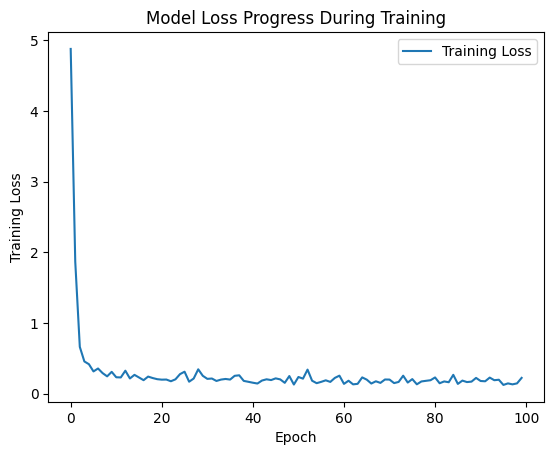

In [98]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])

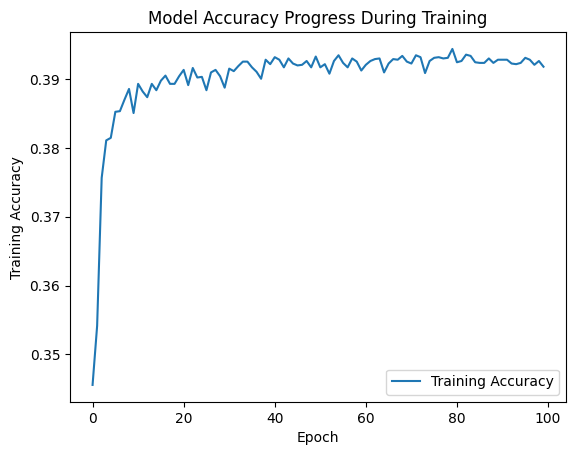

In [99]:
plt.plot(epochs_hist.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])

In [100]:
y_pred = model.predict(X_test)


113/113 [==============================] - 0s 3ms/step


In [106]:
y_pred

array([[0.        ],
       [0.19755435],
       [0.27821562],
       ...,
       [0.02460736],
       [0.        ],
       [0.51214623]], dtype=float32)

In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the regression report

print("Regression Report for BASE MODEL:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)


Regression Report for BASE MODEL:
Mean Absolute Error: 0.1352369055747986
Mean Squared Error: 0.09226501348067657
Root Mean Squared Error: 0.303751565396257
R-squared: 0.9927259845272165
